In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing, decomposition, model_selection, metrics
from sklearn import linear_model, naive_bayes, ensemble, dummy
import keras
from imblearn import over_sampling

%matplotlib inline

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (6,4)

In [2]:
with open("data.pkl", "rb") as f:
    data = pickle.load(f)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Understanding the data

In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# PROPORTION OF CASES WHICH ARE FRAUD CASES
len(data[data.Class == 1]) / len(data)

0.001727485630620034

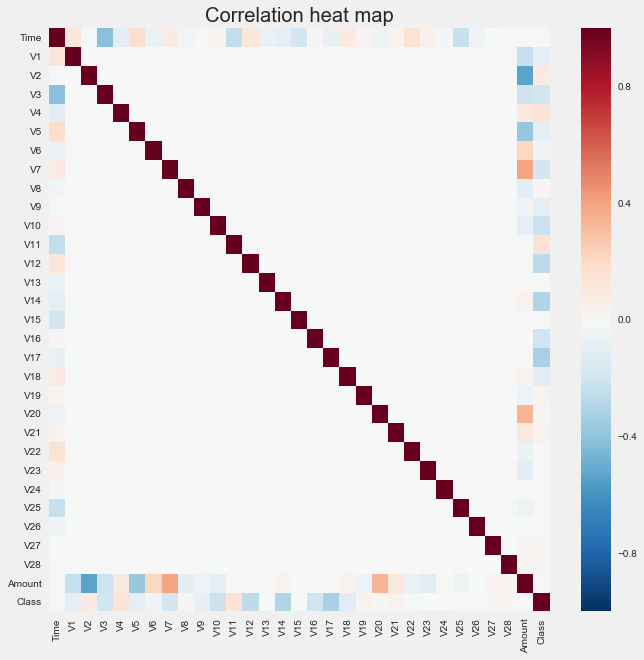

In [8]:
plt.subplots(figsize=(10,10));
sns.heatmap(data.corr());
plt.title("Correlation heat map");
plt.savefig("heatmap.png");

## Notes

- heavily imbalanced classes
    - undersampling
    - oversampling
    - SMOTE
- multicollinearity between features
    - amount seems to be a logical feature to keep
    - based on our heat map, maybe we can use just features V8 to V18 in addition
    - the rest of the Vs are either correlated with amount or have little to no correlation with the class

In [20]:
X = data.ix[:,:-1]
y = data.ix[:,-1]

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.1)

In [22]:
# SCALING
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Logistic regression

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
def model_metrics(model, y_test, y_pred):
    print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
    print(metrics.classification_report(y_test, y_pred))
    print()
    conmat = metrics.confusion_matrix(y_test, y_pred)
    conmat = pd.DataFrame(conmat, index=["not_fraud", "fraud"], columns=["not_fraud", "fraud"])
    return conmat

In [25]:
def eval_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(name)
    return model_metrics(model, y_test, y_pred)

In [33]:
eval_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression")

Logistic Regression
Accuracy: 0.9992275552122467
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.86      0.65      0.74        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28427,5
fraud,17,32


## Notes

- recall
    - out of all that were true, how many did you actually call true
    - all that were fraud: 17 + 32 = 49
    - fraud cases that we predicted correctly = 32
    - recall = 32 / 49 = 0.65
- precision
    - out of all the you predicted true, how many were actually true
    - predicted fraud cases = 5 + 32 = 37
    - actual fraud cases that we called fraud = 32
    - precision = 32 / 37 = 0.86
- our model is not very good at predicting if a case is  a fraud case
- but our accuracy is superb because there aren't many fraud cases
- and there's a small chance of us calling a legit case a fraud case
- but perhaps our objective should be to be able to detech fraud cases better

# Naive Bayes

In [21]:
eval_model(naive_bayes.GaussianNB(), "Naive Bayes")

Naive Bayes
Accuracy: 0.9789333239703663
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     28432
          1       0.07      0.86      0.12        49

avg / total       1.00      0.98      0.99     28481




,not_fraud,fraud
not_fraud,27839,593
fraud,7,42


## Notes

- we have better recall with the naive bayes classifier
- but we also misclassified the legit cases more
- what is our trade off here?
    - investigation costs
    - time

# Ensemble methods

In [22]:
eval_model(ensemble.RandomForestClassifier(n_estimators=100), "Random Forest")

Random Forest
Accuracy: 0.9996488887328394
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.95      0.84      0.89        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28430,2
fraud,8,41


In [23]:
eval_model(ensemble.AdaBoostClassifier(base_estimator=linear_model.LogisticRegressionCV(cv=3)), 
           "Adaboost Logistic Regression")

Adaboost Logistic Regression
Accuracy: 0.9986657771847899
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.70      0.39      0.50        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28424,8
fraud,30,19


In [24]:
eval_model(ensemble.GradientBoostingClassifier(), "Gradient Boost")

Gradient Boost
Accuracy: 0.9993679997191109
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.92      0.69      0.79        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28429,3
fraud,15,34


# Deep learning

In [34]:
nn = keras.models.Sequential()

nn.add(keras.layers.core.Dense(input_dim=X_train_scaled.shape[1], units=10))
nn.add(keras.layers.core.Activation("relu"))
nn.add(keras.layers.core.Dense(input_dim=10, units=1))
nn.add(keras.layers.core.Activation("sigmoid"))

nn.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [35]:
loss = nn.fit(X_train_scaled, np.array(y_train), 
                 validation_split=0.1, epochs=10, 
                 batch_size=100)

Train on 230693 samples, validate on 25633 samples
Epoch 1/10
230693/230693 [==============================] - 7s - loss: 0.0532 - val_loss: 0.0058

In [36]:
y_prob = nn.predict(X_test_scaled)

In [37]:
y_pred = [1 if i > 0.5 else 0 for i in y_prob]

In [38]:
print ("3 layer neural net")
model_metrics(nn, y_test, y_pred)

3 layer neural net
Accuracy: 0.9995084442259752
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.91      0.80      0.85        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28428,4
fraud,10,39


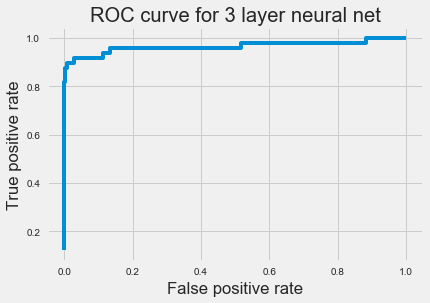

In [40]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
plt.plot(fpr, tpr);
plt.title("ROC curve for 3 layer neural net");
plt.xlabel("False positive rate");
plt.ylabel("True positive rate");

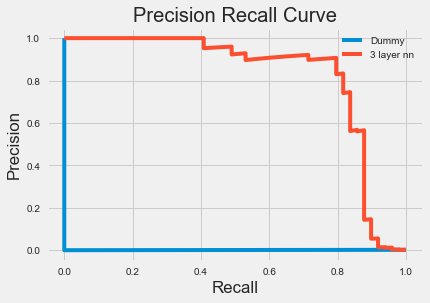

In [50]:
pr_dummy = dummy.DummyClassifier()
pr_dummy.fit(X_train_scaled, y_train)
dummy_pred = pr_dummy.predict_proba(X_test_scaled)[:,1]
precision, recall, threshold = metrics.precision_recall_curve(y_test, dummy_pred)

plt.plot(recall, precision, label='Dummy');

prec, rec, _ = metrics.precision_recall_curve(y_test, y_prob)
plt.plot(rec, prec, label="3 layer nn");
plt.legend();
plt.title("Precision Recall Curve");
plt.xlabel("Recall");
plt.ylabel("Precision");

# With feature 'selection'

In [55]:
X_selected = data[["V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "Amount"]]

In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_selected, y, stratify=y, test_size=0.1)

In [57]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [58]:
X_test_scaled = scaler.transform(X_test)

In [59]:
eval_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression")

Logistic Regression
Accuracy: 0.9991573329588147
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.93      0.55      0.69        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28430,2
fraud,22,27


In [60]:
eval_model(naive_bayes.GaussianNB(), "Naive Bayes")

Naive Bayes
Accuracy: 0.9897826621256276
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     28432
          1       0.12      0.78      0.21        49

avg / total       1.00      0.99      0.99     28481




,not_fraud,fraud
not_fraud,28152,280
fraud,11,38


In [61]:
eval_model(ensemble.GradientBoostingClassifier(), "Gradient Boost")

Gradient Boost
Accuracy: 0.9986306660580738
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.78      0.29      0.42        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28428,4
fraud,35,14


In [15]:
nn = keras.models.Sequential()

nn.add(keras.layers.core.Dense(input_dim=X_train_scaled.shape[1], units=10))
nn.add(keras.layers.core.Activation("relu"))
nn.add(keras.layers.core.Dense(input_dim=10, units=1))
nn.add(keras.layers.core.Activation("sigmoid"))

nn.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [16]:
loss = nn.fit(X_train_scaled, np.array(y_train), 
                 validation_split=0.1, epochs=10, 
                 batch_size=100)

Train on 230693 samples, validate on 25633 samples
Epoch 1/10
230693/230693 [==============================] - 7s - loss: 0.0521 - val_loss: 0.0089

In [17]:
y_prob = nn.predict(X_test_scaled)

In [18]:
y_pred = [1 if i > 0.5 else 0 for i in y_prob]

In [19]:
print ("3 layer neural net")
model_metrics(nn, y_test, y_pred)

3 layer neural net
Accuracy: 0.999403110845827
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.86      0.78      0.82        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28426,6
fraud,11,38


# SMOTE

In [68]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.1)

In [72]:
original_data = pd.concat([X_train, y_train], axis=1)

In [77]:
smoter = over_sampling.SMOTE()
X_train_smote, y_train_smote = smoter.fit_sample(X_train, y_train)

In [87]:
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train = pd.Series(y_train_smote)

In [88]:
y_train.value_counts()

1    255883
0    255883
dtype: int64

In [89]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)

In [90]:
X_test_scaled = scaler.transform(X_test)

In [91]:
eval_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression")

Logistic Regression
Accuracy: 0.9928022190232084
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     28432
          1       0.17      0.82      0.28        49

avg / total       1.00      0.99      1.00     28481




,not_fraud,fraud
not_fraud,28236,196
fraud,9,40


In [92]:
eval_model(naive_bayes.GaussianNB(), "Naive Bayes")

Naive Bayes
Accuracy: 0.9773884343948598
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     28432
          1       0.06      0.86      0.12        49

avg / total       1.00      0.98      0.99     28481




,not_fraud,fraud
not_fraud,27795,637
fraud,7,42


In [93]:
eval_model(ensemble.GradientBoostingClassifier(), "Gradient Boost")

Gradient Boost
Accuracy: 0.9943471085987149
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     28432
          1       0.21      0.84      0.34        49

avg / total       1.00      0.99      1.00     28481




,not_fraud,fraud
not_fraud,28279,153
fraud,8,41


In [62]:
nn = keras.models.Sequential()

nn.add(keras.layers.core.Dense(input_dim=X_train_scaled.shape[1], units=10))
nn.add(keras.layers.core.Activation("relu"))
nn.add(keras.layers.core.Dense(input_dim=10, units=1))
nn.add(keras.layers.core.Activation("sigmoid"))

nn.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [63]:
loss = nn.fit(X_train_scaled, np.array(y_train), 
                 validation_split=0.1, epochs=10, 
                 batch_size=100)

Train on 230693 samples, validate on 25633 samples
Epoch 1/10
230693/230693 [==============================] - 6s - loss: 0.0421 - val_loss: 0.0103

In [64]:
y_prob = nn.predict(X_test_scaled)

In [65]:
y_pred = [1 if i > 0.5 else 0 for i in y_prob]

In [66]:
print ("3 layer neural net")
model_metrics(nn, y_test, y_pred)

3 layer neural net
Accuracy: 0.9992626663389628
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.87      0.67      0.76        49

avg / total       1.00      1.00      1.00     28481




,not_fraud,fraud
not_fraud,28427,5
fraud,16,33
